In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
np.set_printoptions(precision=4)
sns.set_style("whitegrid")

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,learning_curve,validation_curve
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import metrics

In [4]:
# reading dataset
data = pd.read_csv(r'F:\Python\Python\IPython\Admission_Predict_Ver1.1.csv')
data.columns = [col.strip(' ').replace(' ','_').lower() for col in data.columns]
data.drop('serial_no.',axis=1,inplace=True)
data.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# describing dataset to find descriptive stats.
data.describe()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


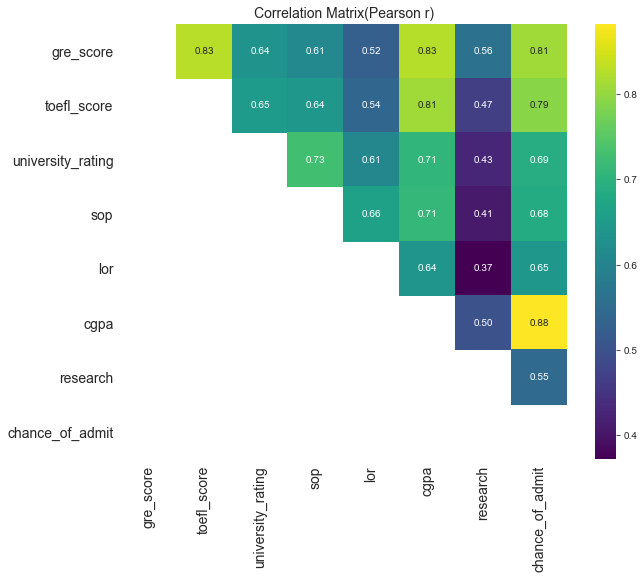

In [6]:
# checking for corelation between features 
corr = data.corr()
corr1 = corr.where(np.where(np.triu(np.ones(corr.shape),k=1)==1,True,False)).copy()

plt.figure(figsize=(10,8))
sns.heatmap(corr1,annot=True,fmt='0.2f',cmap='viridis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix(Pearson r)', fontsize=14)
plt.show()

C:\Users\SUMIT\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chance_of_admit', ylabel='Density'>

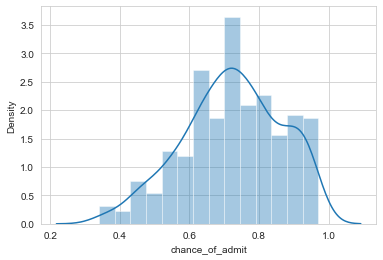

In [7]:
# since the target is continuous lets check for its distribution.
sns.distplot(data.chance_of_admit)

In [8]:
kurt = stats.kurtosis(data.chance_of_admit)
k_stats, k_pval = stats.kurtosistest(data.chance_of_admit)

skewness = stats.skew(data.chance_of_admit)
s_stats, s_pval = stats.skewtest(data.chance_of_admit)

print(f'Kurtosis: {kurt}, skewness: {skewness}')

Kurtosis: -0.4621237427062441, skewness: -0.28909558547899383


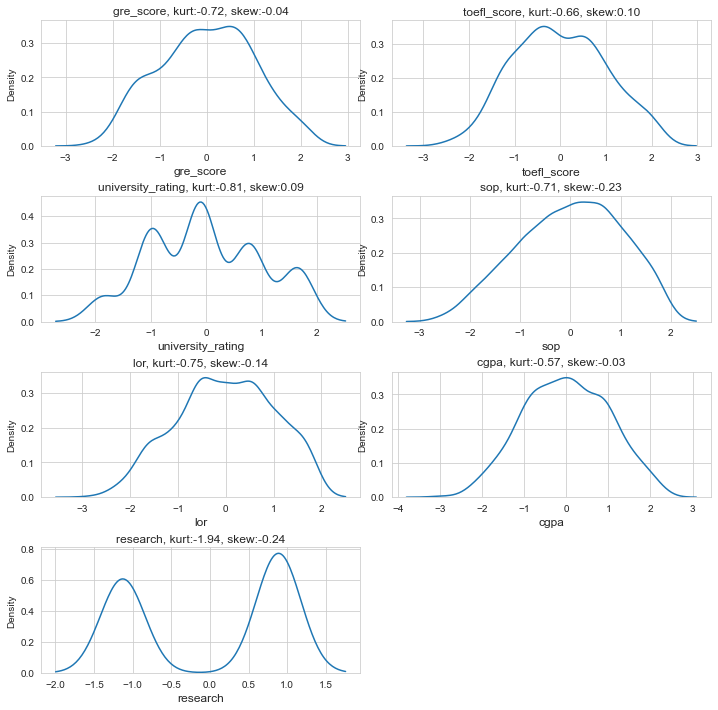

In [9]:
# checking distribution of features
m = len(data.columns.values[:-1])
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for i,col in zip(range(1,m+1),data.columns):
    ax = fig.add_subplot(4, 2, i)
    kurt = stats.kurtosis(data[col])
    skewness = stats.skew(data[col])
    sns.kdeplot(stats.zscore(data[col]))
    plt.title(f'{col}, kurt:{kurt:.2f}, skew:{skewness:.2f}')
    plt.xlabel(col,fontsize=12)


plt.show()

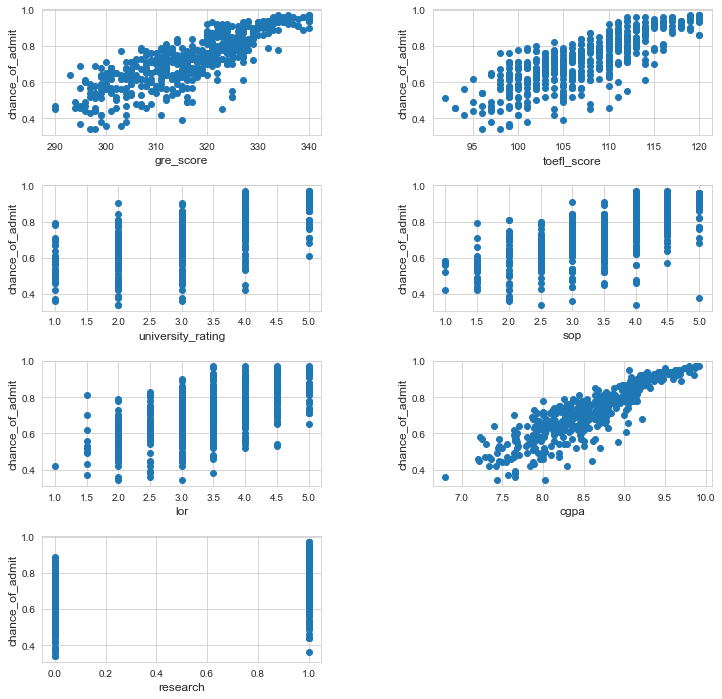

In [10]:
# checking how each feature is related with target variable
m = len(data.columns.values[:-1])
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,col in zip(range(1,m+1),data.columns):
    ax = fig.add_subplot(4, 2, i)
    ax.scatter(data[col], data['chance_of_admit'])
    plt.xlabel(col,fontsize=12)
    plt.ylabel('chance_of_admit',fontsize=12)

plt.show()

<AxesSubplot:xlabel='sop', ylabel='count'>

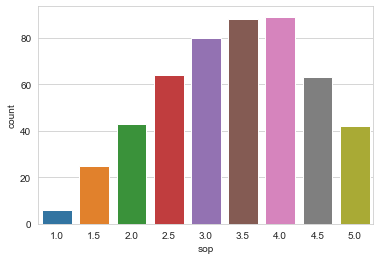

In [11]:
sns.countplot(x='sop', data=data)

<AxesSubplot:xlabel='lor', ylabel='count'>

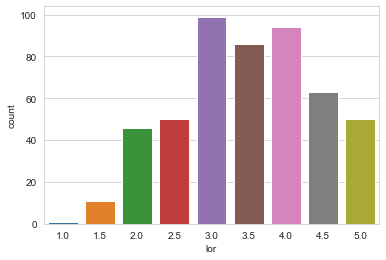

In [12]:
sns.countplot(x='lor', data=data)

<AxesSubplot:xlabel='lor'>

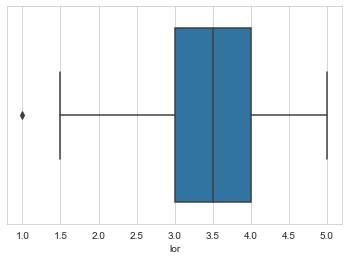

In [13]:
# checking for outliers using boxplot
sns.boxplot(x='lor', data=data)

<AxesSubplot:xlabel='sop'>

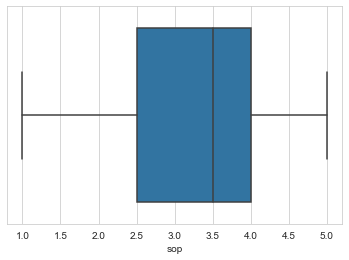

In [14]:
sns.boxplot(x='sop', data=data)

<AxesSubplot:xlabel='chance_of_admit'>

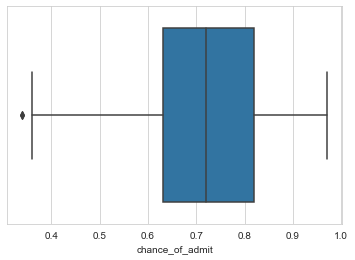

In [15]:
sns.boxplot(x='chance_of_admit', data=data)

In [16]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print('lower_bound:', lower_bound)
    print('upper_bound:', upper_bound)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [17]:
outliers_iqr(data.lor.values)

lower_bound: 1.5
upper_bound: 5.5


(array([347], dtype=int64),)

In [18]:
# dropping outlier
data.iloc[347,4] = 1.5

<AxesSubplot:xlabel='lor'>

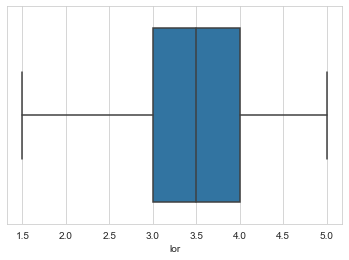

In [19]:
sns.boxplot(x='lor', data=data)

In [20]:
# separating features and target with train test split.
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9,shuffle=True)
print(X_train.shape,X_test.shape)
X_train.head()

(400, 7) (100, 7)


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
212,338,120,4,5.0,5.0,9.66,1
460,319,105,4,4.0,4.5,8.66,1
378,303,98,1,2.0,2.5,7.65,0
99,323,113,3,4.0,4.0,8.88,1
450,320,112,4,3.0,4.5,8.86,1


In [21]:
# creating preprocessing pipeline
preprocess = make_column_transformer((OrdinalEncoder(),['sop','lor']),
                                     remainder='passthrough')
pipe = make_pipeline(preprocess,StandardScaler())
X_train = pipe.fit_transform(X_train)
X_train

array([[ 1.6894,  1.6732,  1.9034, ...,  0.7887,  1.7779,  0.8819],
       [ 0.6678,  1.1313,  0.2099, ...,  0.7887,  0.1404,  0.8819],
       [-1.3753, -1.0365, -1.2162, ..., -1.8186, -1.5135, -1.1339],
       ...,
       [ 0.6678, -0.4945,  0.5664, ..., -0.0804,  1.2211,  0.8819],
       [-1.3753, -1.5784, -1.3053, ..., -1.8186, -2.1685, -1.1339],
       [ 1.1786,  0.5894,  0.6556, ...,  0.7887,  0.9427,  0.8819]])

In [22]:
# adding constant ie x0 and training our model
X_train = sm.add_constant(X_train)
ols_reg = sm.OLS(y_train,X_train).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.04e-142
Time:                        13:59:03   Log-Likelihood:                 557.49
No. Observations:                 400   AIC:                            -1099.
Df Residuals:                     392   BIC:                            -1067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7199      0.003    237.359      0.0

### Interpretation of Summary Table:

- R-squared value for good linear regression model should be close to 1 but if we add more non informative features then R-squared value will remain high but Adjusted R-squared value penalizes R-squared value but in our case both of then are close so our model generalizes to new unseen data.
- F-statistic or F-test is used to assess the signifiance of overall regression model. In multiple regression ie regression with multiple features it compares the model with no predictors ie intercept only model to model with all features. 
    - Null Hypothysis - These two models are equal.
    - Alternate Hypothysiz - Intercept only model is worst than our model </br>
    
In our case since p value is lower than 0.05 we reject the null hypothysis and accept the alternate hypothysis ie there is a good amount of linear relation ship between our features and target.
- In order to find whether a given feature is significant to infer target we perform t-test. In t-test it look at relation of each feature with target independently ie without taking into account all features at once.
    - Null Hypothysis - t statistic value of a particular feature is equal to 0
    - Alternate Hypothysiz - feature coefficient value of particular feature will not be 0

Higher the t-value we reject the null hypothysis and accept the alternate hypothysis. Also lower the p value we reject null hypothysis and accept alternate hypothysis. In our case x1 feature has higher p value so we can assume that its not a good predictor of target variable.

In [23]:
# prediction using test data
X_test = pipe.transform(X_test)
X_test = sm.add_constant(X_test)

In [24]:
y_pred = ols_reg.predict(X_test)
y_pred[:5]

array([0.6175, 0.6715, 0.6637, 0.7157, 0.6677])

In [25]:
# calculating residual ie deviation from predictions and actual value
residual = y_test - y_pred
r2_score = metrics.r2_score(y_test,y_pred)
print('r2_score = ',r2_score)
print('adjusted r2_score = ',1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score =  0.813649879007339
adjusted r2_score =  0.7972674507882039
RMSE =  0.05830198320355701


## Verifying Assumptions of Linear Regression

- **No Multicolinearity (litte to no multi-colinearity in dataset)**
- **Normailty of Residual**
- **Homoscedasticity or constant variance**
- **No autocorrelation of residuals**

In [26]:
# checking for multicollinearity in independent features. we can check multi-colinearity using statsmodel's vif. VIF>10 signifies
# that there is heavy multi-colinearity in our dataset, whereas vif<5 is acceptable.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=['sop','lor','gre','toefl','university_rating','cgpa','research']).T

# in our case cgpa is slighly greater than 5 so we can take it for model predictions. so assumption 1 is validated.

,sop,lor,gre,toefl,university_rating,cgpa,research
vif,3.080186,2.001281,4.661953,3.920987,2.803514,5.018398,1.485878


C:\Users\SUMIT\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chance_of_admit', ylabel='Density'>

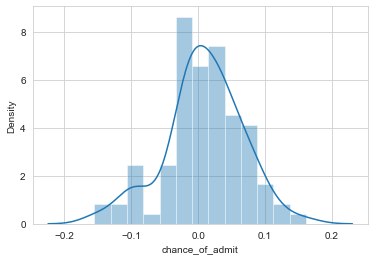

In [27]:
# checking for Normailty of Residual
sns.distplot(residual)
# in our case it's near normal distribution centered around 0. so assumption 2 is validated.

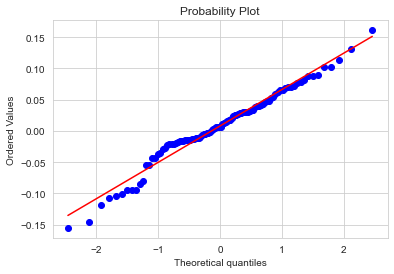

In [28]:
# checking for Normailty of Residual using probplot
stats.probplot(residual,dist='norm',plot=plt)
plt.show()
# most of the residual falls in straight line so it's near normal.

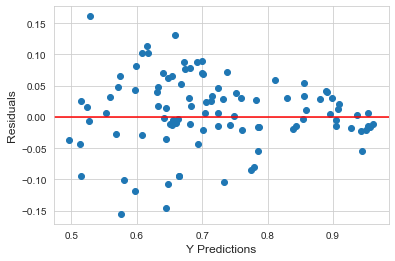

In [29]:
# checking for Homoscedasticity in residuals
plt.scatter(y_pred,residual)
plt.axhline(color='r')
plt.xlabel('Y Predictions', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()
# residuals are randomly distributed without any pattern around 0 which fullfills our third assumption of linear regression.

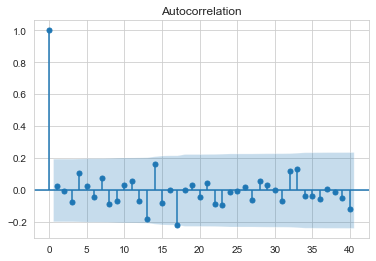

In [30]:
# checking for No autocorrelation of residuals ie no co-relation of any residual with any of its lag value.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
plt.show()
# none of the values crosses thershold for being significant.

In [31]:
print(y_pred[:5])
print(y_test[:5])

[0.6175 0.6715 0.6637 0.7157 0.6677]
370    0.72
256    0.76
124    0.57
320    0.75
322    0.72
Name: chance_of_admit, dtype: float64


In [32]:
round(residual,2)

370    0.10
256    0.09
124   -0.09
320    0.03
322    0.05
       ... 
72     0.04
34    -0.02
478   -0.01
420   -0.09
89    -0.02
Name: chance_of_admit, Length: 100, dtype: float64